In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from ClusterModel import model
from ClusterTools import cluster_profile

dict_base = {'font.size':        16, 
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15, # Ensure enough space on the left so that all plot can be aligned
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster(redshift=0.023, M500=7e14*u.Msun)
clust.D_lum
clust.spectrum_crp_model = {'name':'PowerLaw', "Index":2.2}

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.
Getting D_lum value
Setting spectrum_crp_model value


In [3]:
EBLmod = ['none', 'franceschini', 'kneiske', 'finke', 'dominguez', 'dominguez-upper', 'dominguez-lower', 'gilmore', 'gilmore-fixed']

Setting EBL_model value
Setting EBL_model value
Setting EBL_model value
Setting EBL_model value
Setting EBL_model value
Setting EBL_model value
Setting EBL_model value
Setting EBL_model value
Setting EBL_model value


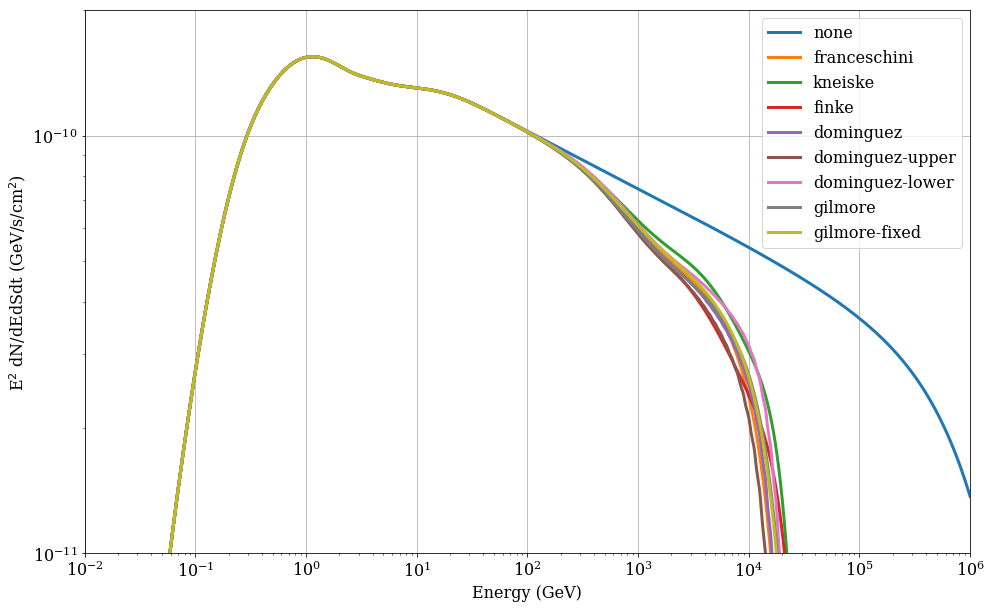

In [6]:
plt.figure(2,figsize=(15,10))

for i in EBLmod:
    clust.EBL_model = i
    E,Sg = clust.get_gamma_spectrum()
    plt.loglog(E.to('GeV'), (E**2*Sg).to('GeV s-1 cm-2'), linewidth=3, label=i)
plt.ylabel('E$^2$ dN/dEdSdt (GeV/s/cm$^2$)')
plt.xlabel('Energy (GeV)')
plt.xlim(1e-2, 1e6)
plt.ylim(1e-11, 2e-10)
plt.grid()
plt.legend()